In [1]:
import os
import string
import pandas as pd
import nltk
from nltk.util import bigrams, ngrams
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler

### Function to read a CSV file and return a DataFrame

In [2]:
def read_csv_file(file_name):
    file_path = os.path.join(datasets_folder, file_name)
    if os.path.isfile(file_path):
        return pd.read_csv(file_path)
    return None

### Function to preprocess text by lowercasing, removing stopwords, and tokenizing

In [3]:
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese')) 
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

### Function to generate and plot n-grams

In [4]:
# Function to generate and plot n-grams
def generate_and_plot_ngrams(df, column_name, n, title, bar_color='skyblue'):
    df[column_name] = df['preprocessed_text'].apply(lambda x: list(ngrams(x, n)))

    # Count the frequency of n-grams
    ngram_frequency = Counter()
    for ngram_list in df[column_name]:
        ngram_frequency.update(ngram_list)

    # Get the most frequent n-grams while excluding specific terms and punctuation
    exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :','mundo'}

    exclude_punctuation = set(string.punctuation)

    most_common_ngrams = [(ngram, freq) for ngram, freq in ngram_frequency.most_common() if all(term not in ngram and all(char not in ngram for char in exclude_punctuation) for term in exclude_terms)][:10]

    # Unzip n-gram and frequency into separate lists and convert n-grams to strings
    ngram, frequency = zip(*most_common_ngrams)
    ngram = [' '.join(n) for n in ngram]

    # Create a chart for the most frequent n-grams
    plt.figure(figsize=(12, 8))  # Increase figure size
    plt.bar(ngram, frequency,color=bar_color)
    plt.ylabel(f'Frequency')
    plt.xlabel(f'{n}-grams')
    plt.title(title)
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Example usage:
# generate_and_plot_ngrams(df, 'ngrams', 2, 'Top 10 Bigrams')


In [5]:
datasets_folder = "../datasets"
file_name = "tupi_hierarchy.csv"
df_tupi_hier = read_csv_file(file_name)
df_tupi_hier_filter = df_tupi_hier.query(f"hate == 0")
color = "#1696D2"

In [6]:
df_tupi_hier_filter.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source
20,1.65848623682539e+18,"o cara cantou ""seu guarda eu não sou vagundo e...",1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter
21,1.6584862359572e+18,@user mais que canalha hein? como alguém tem c...,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter
22,1.65848623597398e+18,@user @user @user se você ussasse pelo menos 7...,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter
23,1.6584862360117e+18,@user em que mundo esse corno vive? pqp,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter
24,1.65848623797046e+18,@user faz o l caralho,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter


/tmp/ipykernel_30576/3729736624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tupi_hier_filter['text'] = df_tupi_hier_filter['text'].str.lower()
/tmp/ipykernel_30576/3729736624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tupi_hier_filter['preprocessed_text'] = df_tupi_hier_filter['text'].apply(preprocess_text)
/tmp/ipykernel_30576/1715826465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

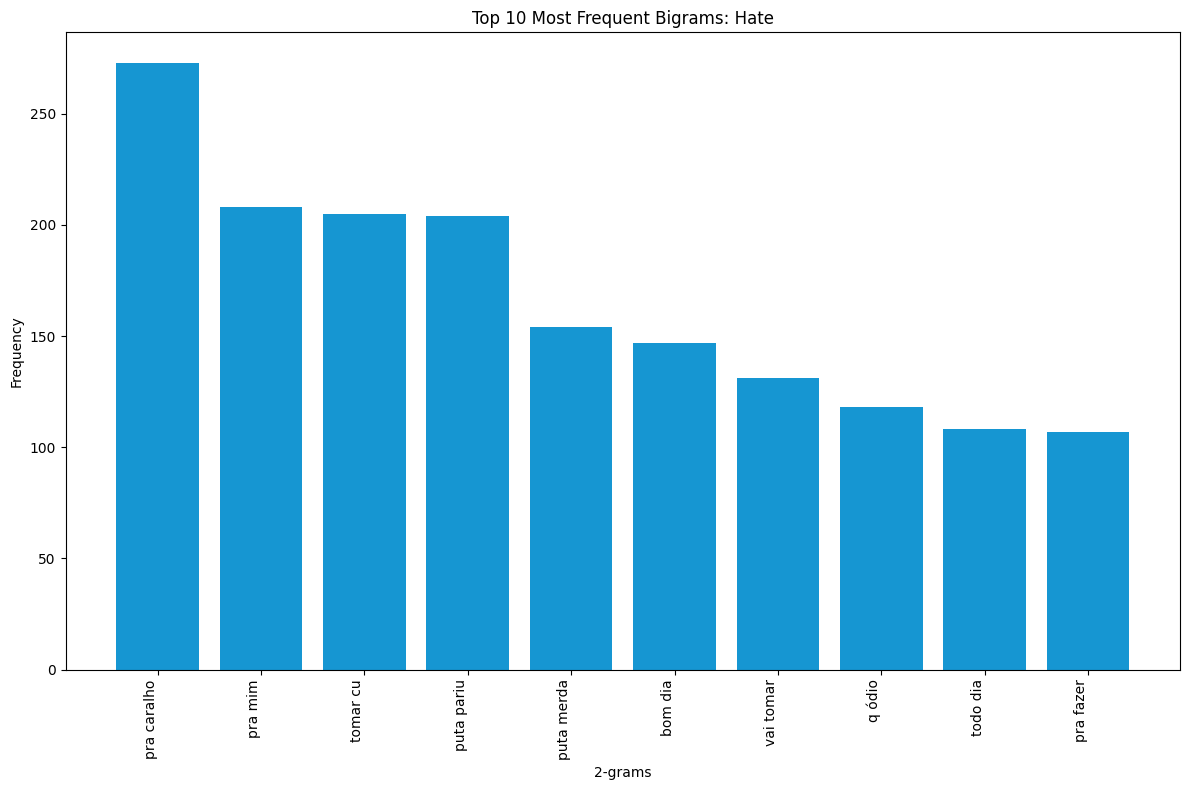

In [7]:
if df_tupi_hier_filter is not None:
    df_tupi_hier_filter['text'] = df_tupi_hier_filter['text'].str.lower()
    df_tupi_hier_filter['preprocessed_text'] = df_tupi_hier_filter['text'].apply(preprocess_text)

    # Generate and plot bigrams with stopwords
    #generate_and_plot_ngrams(df_tupi_hier, 'bigrams', 2, 'Top 10 Most Frequent Bigrams (With Stopwords)')

    # Generate and plot bigrams without stopwords
    generate_and_plot_ngrams(df_tupi_hier_filter, 'bigrams', 2, 'Top 10 Most Frequent Bigrams: Hate',color)

    # Generate and plot trigrams without stopwords
    #generate_and_plot_ngrams(df_tupi_hier_filter, 'trigrams', 3, 'Top 10 Most Frequent Trigrams')

file_name = "tupi_binary.csv"
df_tupi_binary = read_csv_file(file_name)

In [8]:
df_tupi_hier_filter.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source,preprocessed_text,bigrams
20,1.65848623682539e+18,"o cara cantou ""seu guarda eu não sou vagundo e...",1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,"[cara, cantou, ``, guarda, vagundo, delinquent...","[(cara, cantou), (cantou, ``), (``, guarda), (..."
21,1.6584862359572e+18,@user mais que canalha hein? como alguém tem c...,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,"[user, canalha, hein, ?, alguém, coragem, desp...","[(user, canalha), (canalha, hein), (hein, ?), ..."
22,1.65848623597398e+18,@user @user @user se você ussasse pelo menos 7...,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,"[user, user, user, ussasse, menos, 7, %, céreb...","[(user, user), (user, user), (user, ussasse), ..."
23,1.6584862360117e+18,@user em que mundo esse corno vive? pqp,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,"[user, mundo, corno, vive, ?, pqp]","[(user, mundo), (mundo, corno), (corno, vive),..."
24,1.65848623797046e+18,@user faz o l caralho,1,0,0,0,0,0,0,0,0,0,0,0,0,oliveira et al,2023,twitter,"[user, faz, l, caralho]","[(user, faz), (faz, l), (l, caralho)]"


In [9]:
df_tupi_hier_filter_2 = df_tupi_hier_filter.query(f"other == 1")

In [10]:
# ... (previous code)

### Function to generate and display a table with the 20 most frequent words
def generate_and_display_word_table(df, column_name, title, stop_words):
    # Flatten the list of preprocessed tokens
    all_tokens = [token for tokens in df[column_name] for token in tokens]

    # Count the frequency of each word
    word_frequency = Counter(all_tokens)

    # Get the 20 most frequent words while excluding specific terms and punctuation
    exclude_terms = {'desse', 'aí', 'n', 'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :', 'rt',
    'ta', 'tá', 'q', 'pq', 'ter', 'pra', 'vcs', 'todos', 'aí', 'nunca', 'fala', 'ver', 'coisa', 'desse', 'todo', 'quer', 'agora', 'faz',
    'n', 'fazer', 'ainda', 'dia', 'pode', 'tudo', 'nao', 'nada', 'vc', 'vai', 'pq', 'por que', 'porque', 'eh', 'ne', 'né', 'é', 'p'
    'la', 'lá', 'ai', 'aí', 'to', 'tô','sobre','fez','pois','onde','aqui','sempre','sim'}
    exclude_punctuation = set(string.punctuation)

    most_common_words = [(word, freq) for word, freq in word_frequency.most_common(100) if
                         word.lower() not in stop_words and
                         not any(char in word for char in exclude_terms) and
                         all(char not in word for char in exclude_punctuation)]

    # Create a DataFrame for the most frequent words
    word_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # Display the table
    print(f'\nTop 20 Most Frequent Words - {title}\n')
    print(word_df)

# ... (previous code)

# Call preprocess_text to get stop_words
stop_words = set(preprocess_text(''))

In [11]:
# Generate and display a table with the 20 most frequent words
generate_and_display_word_table(df_tupi_hier_filter_2, 'preprocessed_text', 'All Words', stop_words)


Top 20 Most Frequent Words - All Words

       Word  Frequency
0        cu        241
1     porra        181
2      cara        179
3   caralho        164
4       fdp        109
5       pau         99
6      lixo         92
7      feio         87
8     merda         80
9      feia         79
10      vou         73
11        p         63
12    ficar         56
13      bem         54
14     casa         54
15     fica         51
16    filho         49
17    filha         49
18  pessoas         48
19   pessoa         47
20      mim         42
21      tão         42
22   brasil         41
23    burro         41
24     hoje         39
25     sabe         39
26    dessa         39
27      vsf         39
28     vida         39
29     deus         39
30      dar         37
31    odeio         37
32     acho         36
33     povo         36
34    fuder         36
35   babaca         36
36   mulher         35
37        ”         34
38      mãe         34
